# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("BASE_SUPERMERCADO.csv")
df.head(10)

#Em uma análise dos dados da tabela, verifiquei que muitos produtos tinham 'Preco_Normal', 'Preco_Desconto', 'Preco_Anterior' e 'Desconto' zerados
#Isso alteraria a análise estatistica de maneira significativa além de causar problemas na hora de plotar alguns gráficos.

print(df[['Preco_Normal', 'Preco_Desconto', 'Preco_Anterior', 'Desconto']].describe())
removedor = (df['Preco_Normal'] == 0) & \
            (df['Preco_Desconto'] == 0) & \
            (df['Preco_Anterior'] == 0) & \
            (df['Desconto'] == 0)

df_limpo = df[~removedor].copy()

print("\nEstatísticas descritivas para as colunas de preço no DataFrame limpo:")
print(df_limpo[['Preco_Normal', 'Preco_Desconto', 'Preco_Anterior', 'Desconto']].describe())

       Preco_Normal  Preco_Desconto  Preco_Anterior     Desconto
count   1107.000000     1107.000000     1107.000000  1107.000000
mean    2070.997290      522.269196      372.257453    68.109304
std     2961.257627     1339.559852     1239.475017   241.158310
min        0.000000        0.000000        0.000000     0.000000
25%        0.000000        0.000000        0.000000     0.000000
50%     1269.000000        0.000000        0.000000     0.000000
75%     2849.000000        0.000000        0.000000     0.000000
max    19788.000000    14550.000000    18899.000000  4349.000000

Estatísticas descritivas para as colunas de preço no DataFrame limpo:
       Preco_Normal  Preco_Desconto  Preco_Anterior     Desconto
count   1057.000000     1057.000000     1057.000000  1057.000000
mean    2168.963103      546.974456      389.866604    71.331126
std     2995.256643     1365.964037     1265.767749   246.335053
min        0.000000        0.000000        0.000000     0.000000
25%      275.000000

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [4]:
df_limpo.groupby('Categoria')['Preco_Normal'].mean().reset_index()


,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1869.605263
1,comidas-preparadas,3310.976744
2,congelados,2153.869565
3,frutas,1724.473684
4,instantaneos-y-sopas,823.264151
5,lacteos,2508.689412
6,verduras,1457.135593


In [5]:
df_limpo.groupby('Categoria')['Preco_Normal'].median().reset_index()


,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1629.0
1,comidas-preparadas,3490.0
2,congelados,1565.0
3,frutas,1195.0
4,instantaneos-y-sopas,579.0
5,lacteos,1159.0
6,verduras,1250.0


*ANTES DA REMOÇÂO dos valores zerados:*

Em ordem de maior diferença entre média e mediana temos, respectivamente: Lacteos(média maior que a mediana em 1396), Congelados(média maior que a mediana em 589), Frutas(média maior que a mediana em 529) e Istantâneos e Sopas(média maior que a mediana em 326).  

*DEPOIS DA REMOÇÂO dos valores zerados:*

Em ordem de maior diferença entre média e mediana temos, respectivamente: Lacteos(média maior que a mediana em 1349), Congelados(média maior que a mediana em 588), Frutas(média maior que a mediana em 529) e Istantâneos e Sopas(média maior que a mediana em 244).  


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [6]:
df_limpo.groupby('Categoria')['Preco_Normal'].std().reset_index()

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2226.966957
1,comidas-preparadas,1907.747656
2,congelados,2111.116685
3,frutas,1639.151114
4,instantaneos-y-sopas,1194.282149
5,lacteos,3987.635218
6,verduras,972.230682


Os Três maiores desvios-padrão são(sem alteração entre pré e pós limpeza): Lácteos,  Beleza e Cuidados e Congelados. Nos Lácteos, a média é muito maior que a mediana, esse comportamento sugere que existem alguns produtos que tem o preço muito elevado em relação a média (um queijo importado e premiado, por exemplo) que acaba jogando o valor da média para mais longe, á direita, da mediana. Em Beleza e Cuidados a média é ligeiramente maior que a mediana, isso nos indica que os produtos possuem preços bem distribuidos em torno da mediana (embora exista um leve deslocamento para a direita na curva). Por fim em gongelados temos uma média significativamente maior que a mediana o que nos sugere que, embora existam produtos com o preço mais próximo da mediana, existem opções Premium disponíveis por um preço maior (Frutos do mar ou Pratos Gourmet congelados, por exemplo)

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

C:\Users\henri\AppData\Local\Temp\ipykernel_17748\4002945828.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_lacteos = df_limpo[df['Categoria'] == 'lacteos']


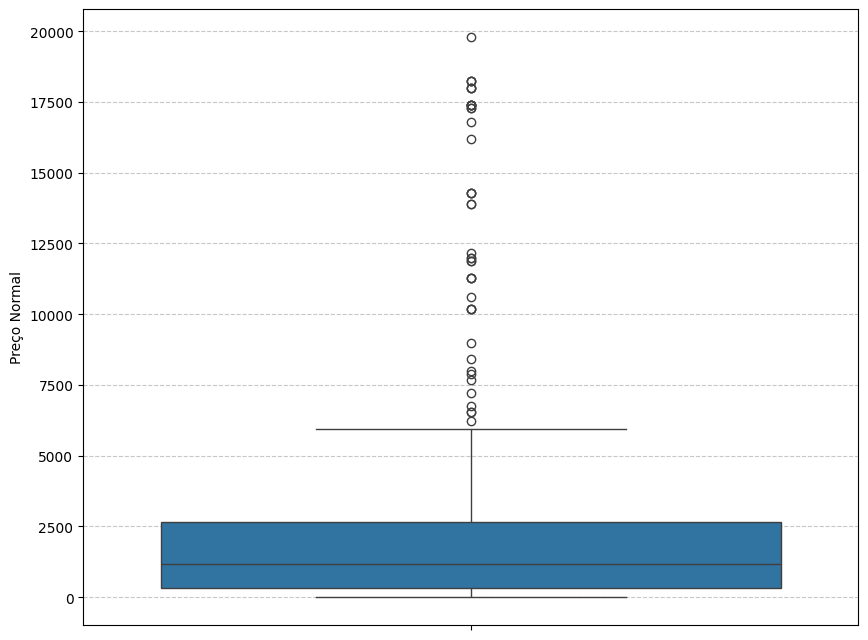

In [7]:
df_lacteos = df_limpo[df['Categoria'] == 'lacteos']


plt.figure(figsize=(10, 8))
sns.boxplot(y=df_lacteos['Preco_Normal'])

plt.ylabel('Preço Normal')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

#Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?
#Como podemos observar no gráfico, a maior parte dos produtos se encontra numa média de preços mais baixa(próximos da média de 2385), entretanto,
#possuímos muitos valores que fogem do whisker superior - chegando a custar quase nove vezes o valor da média.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

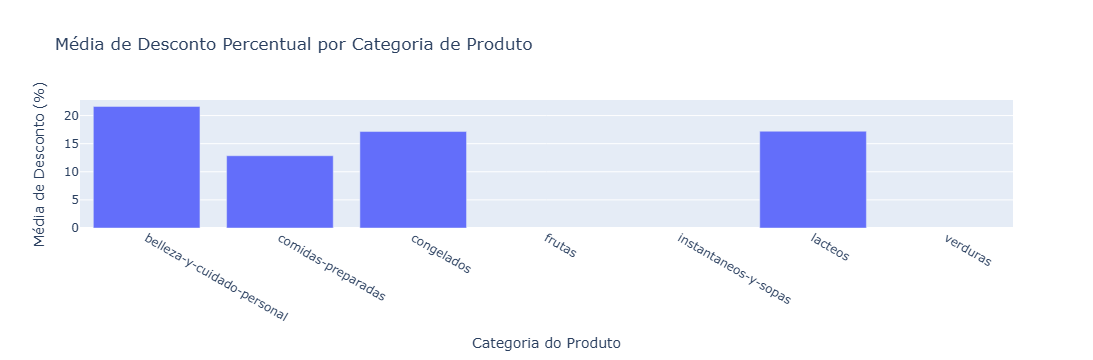

In [8]:
df_limpo['Desconto_Percentual'] = (df_limpo['Desconto'] / df_limpo['Preco_Anterior']) * 100
media_por_categoria = df_limpo.groupby('Categoria')['Desconto_Percentual'].mean().reset_index()
fig = px.bar(media_por_categoria,
             x='Categoria',
             y='Desconto_Percentual', # Usar a coluna com a média do desconto
             orientation='v',
             title='Média de Desconto Percentual por Categoria de Produto',
             labels={'Categoria':'Categoria do Produto', 'Desconto_Percentual':'Média de Desconto (%)'}) # Rótulos corrigidos

fig.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

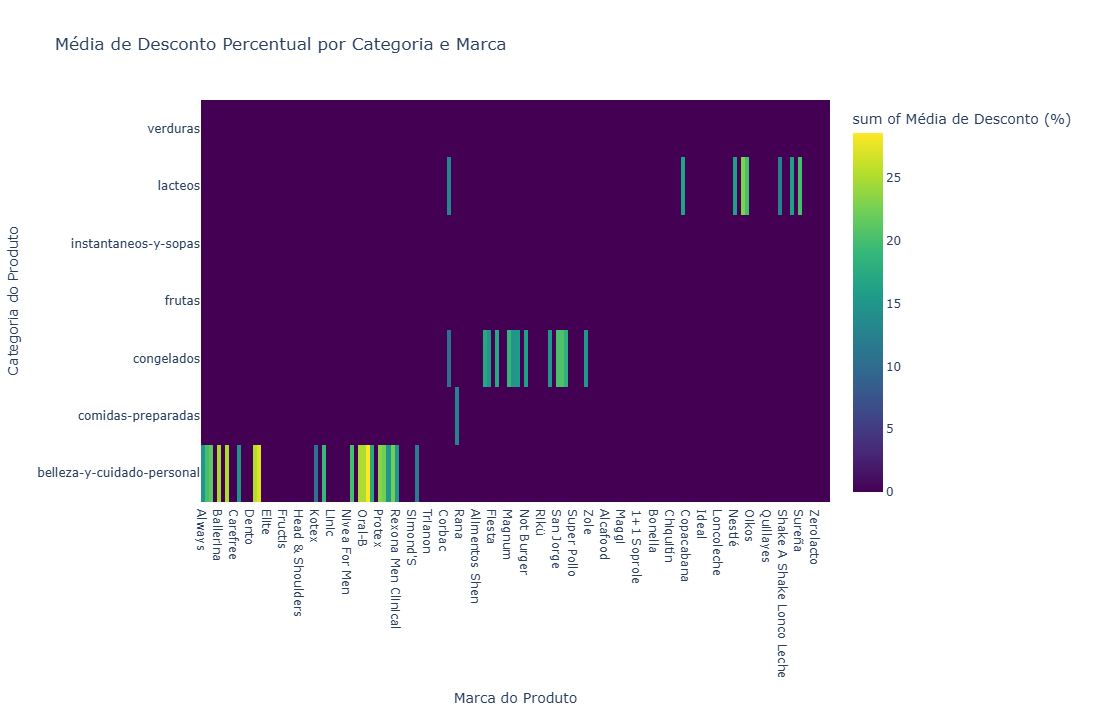

In [9]:
df['Desconto_Percentual'] = (df['Desconto'] / df['Preco_Anterior']) * 100
media_desconto_agrupada = df.groupby(['Categoria', 'Marca'])['Desconto_Percentual'].mean().reset_index()
fig = px.density_heatmap(
    media_desconto_agrupada,
    x='Marca',
    y='Categoria',
    z='Desconto_Percentual',
   
    title='Média de Desconto Percentual por Categoria e Marca',
    color_continuous_scale=px.colors.sequential.Viridis, 
    labels={
        'Marca': 'Marca do Produto',
        'Categoria': 'Categoria do Produto',
        'Desconto_Percentual': 'Média de Desconto (%)'
   }
)
fig.update_layout(
    height=700,  
    width=1500   
)
fig.show()

In [11]:
import plotly.express as px
import plotly.io as pio

# Configura o renderizador adequado para o seu ambiente (ex: Jupyter Notebook)
pio.renderers.default = 'notebook_connected' # ou 'iframe' se necessário

# Remover linhas onde o Desconto é nulo ou zero
df_filtrado = df[df['Desconto'].notna() & (df['Desconto'] > 0)]
 # Agrupar dados
media_desconto_por_categoria_marca = df_filtrado.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

   # Plotar o Treemap
fig = px.treemap(media_desconto_por_categoria_marca,
            path=['Categoria', 'Marca'],
            values='Desconto',
            title='Média de Desconto por Categoria e Marca',
            color='Desconto',
            color_continuous_scale='Blues')

fig.show()